In [2]:
from sktime.datasets import load_arrow_head  # univariate dataset
X_train_orig, y_train_orig = load_arrow_head(split="test", return_X_y=True)
X_test_orig, y_test_orig = load_arrow_head(split="train", return_X_y=True)

In [3]:
X_train_orig

,dim_0
0,0 -1.907777 1 -1.904890 2 -1.88856...
1,0 -1.829855 1 -1.808497 2 -1.79577...
2,0 -1.801563 1 -1.775734 2 -1.72848...
3,0 -1.885718 1 -1.855170 2 -1.84519...
4,0 -1.959051 1 -1.974930 2 -1.97141...
...,...
170,0 -1.625142 1 -1.622988 2 -1.62606...
171,0 -1.657757 1 -1.664673 2 -1.63264...
172,0 -1.603279 1 -1.587365 2 -1.57740...
173,0 -1.739020 1 -1.741534 2 -1.73286...


In [4]:
from sktime.classification.shapelet_based import ShapeletTransformClassifier

model = ShapeletTransformClassifier()
model.fit(X_train_orig, y_train_orig)

model.score(X_test_orig, y_test_orig)

0.8888888888888888

In [21]:
import importlib
import pyreal.explainers.time.occlusion_importance as oi
importlib.reload(oi)
import time

transformers = []

explainer = oi.OcclusionImportance(model, X_train_orig, window_size=3, classes=['0', '1', '2'])
explainer.fit()
start = time.time()
explanation1 = explainer.produce(X_train_orig.iloc[0][0])
explanation2 = explainer.produce(X_train_orig.iloc[1][0])
print("total time: ", time.time() - start)

[[2.48160e+02 5.45000e-01 2.95000e-01]
 [2.48160e+02 5.45000e-01 2.95000e-01]
 [2.48160e+02 5.45000e-01 2.95000e-01]
 [2.48160e+02 5.45000e-01 2.95000e-01]
 [2.48160e+02 5.45000e-01 2.95000e-01]
 [2.48160e+02 5.45000e-01 2.95000e-01]
 [2.48160e+02 5.45000e-01 2.95000e-01]
 [2.48160e+02 5.45000e-01 2.95000e-01]
 [2.48160e+02 5.45000e-01 2.95000e-01]
 [2.48160e+02 5.45000e-01 2.95000e-01]
 [2.48160e+02 5.45000e-01 2.95000e-01]
 [2.48160e+02 5.45000e-01 2.95000e-01]
 [2.48160e+02 5.45000e-01 2.95000e-01]
 [2.48165e+02 5.40000e-01 2.95000e-01]
 [2.48170e+02 5.35000e-01 2.95000e-01]
 [2.48175e+02 5.30000e-01 2.95000e-01]
 [2.48180e+02 5.25000e-01 2.95000e-01]
 [2.48185e+02 5.20000e-01 2.95000e-01]
 [2.48185e+02 5.20000e-01 2.95000e-01]
 [2.48180e+02 5.25000e-01 2.95000e-01]
 [2.48180e+02 5.25000e-01 2.95000e-01]
 [2.48175e+02 5.30000e-01 2.95000e-01]
 [2.48170e+02 5.35000e-01 2.95000e-01]
 [2.48165e+02 5.40000e-01 2.95000e-01]
 [2.48165e+02 5.40000e-01 2.95000e-01]
 [2.48160e+02 5.45000e-01

In [ ]:
import importlib
import pyreal.explainers.time.occlusion_importance as oi
importlib.reload(oi)
import time

transformers = []

explainer = oi.OcclusionImportance(model, X_train_orig, window_size=3, classes=['0', '1', '2'])
explainer.fit()
start = time.time()
explanation1 = explainer.produce(X_train_orig.iloc[0][0])
explanation2 = explainer.produce(X_train_orig.iloc[1][0])
print("total time: ", time.time() - start)

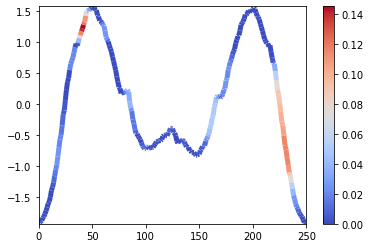

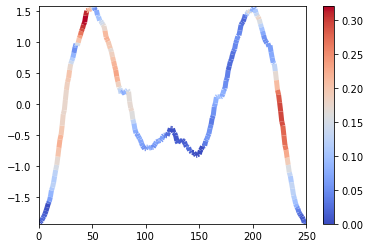

In [20]:
import pyreal.utils.visualize as vis
importlib.reload(vis)

vis.plot_timeseries_saliency(X_train_orig.iloc[0][0], explanation1[0][0:245])
vis.plot_timeseries_saliency(X_train_orig.iloc[0][0], explanation2[0][0:245])
